<a href="https://colab.research.google.com/github/StillWork/c9/blob/master/gg_z_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST

<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Fashion-MNIST?

paper [here](https://arxiv.org/abs/1708.07747) 


## Overview

<br> **Notebook location on github**: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist)

훈련 데이터: 60,000  
테스트 데이터:10,000  
카테고리: 10  
그레이 스케일 이미지: 28x28

<br> 레이블
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot


>[Fashion-MNIST](#scrollTo=r2NPAI4jZZgi)

>>[Fashion-MNIST?](#scrollTo=XLMRPLVCFwEc)

>>[Overview](#scrollTo=Ixyte299ZZgk)

>>[데이터 다운로드](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[훈련, 검증, 테스트 데이터](#scrollTo=CFlNHktHBtru)

>>[모델 생성](#scrollTo=HhalcO03ZZg3)

>>[모델 컴파일](#scrollTo=FhxJ5dinZZg8)

>>[훈련](#scrollTo=DtOvh3YVZZg_)

>>[최상의 모델 파라미터](#scrollTo=e-MGLwZQy05d)

>>[정확도 (score)](#scrollTo=9RTRkan4yq5H)

>>[예측 시각화](#scrollTo=oJv7XEk10bOv)

>>[결과는 90% 정확도](#scrollTo=8AehWdRAVKN5)



## 데이터 다운로드

In [11]:
# !pip install -q -U tensorflow>=1.8.0
# import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


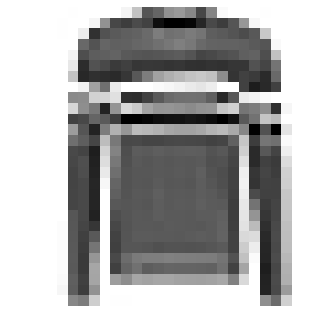

In [12]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# 이미지에서 그리드를 없앤다
plt.axis('off')
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## 훈련, 검증, 테스트 데이터


In [15]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## 모델 생성


In [16]:
from keras import layers
from keras import models
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                 activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)  

## 모델 컴파일

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 훈련

 [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) 

- 매 이포크마다 결과를 저정하며  "save_best_only = True"를 설정하며 검증 성능이 개선될 때마다 기록


In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', 
                               verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 181us/step - loss: 0.5917 - acc: 0.7834 - val_loss: 0.3789 - val_acc: 0.8662

Epoch 00001: val_loss improved from inf to 0.37889, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 8s 150us/step - loss: 0.4067 - acc: 0.8519 - val_loss: 0.3203 - val_acc: 0.8872

Epoch 00002: val_loss improved from 0.37889 to 0.32027, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 8s 150us/step - loss: 0.3655 - acc: 0.8681 - val_loss: 0.2888 - val_acc: 0.8976

Epoch 00003: val_loss improved from 0.32027 to 0.28883, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 8s 150us/step - loss: 0.3389 - acc: 0.8768 - val_loss: 0.2786 - val_acc: 0.8980

Epoch 00004: val_loss improved from 0.28883 to 0.27860, saving

## 최상의 모델 파라미터

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## 정확도 (score)

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

## 예측 시각화

- 예측과 실제 레이블을 비교 (맞으면 초록색으로, 틀리면 붉은색으로)

In [0]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## 결과는 90% 정확도